# NLP Sentiment Analysis - Step 1: Data Loading and EDA

This notebook demonstrates loading the IMDB dataset, creating train/validation/test splits, and performing basic exploratory data analysis.

## 1. Imports
Import required libraries for data handling and visualisation.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

## 2. Convert HuggingFace Dataset to Pandas DataFrames
Split the training set into train and validation sets.

In [6]:
def to_df(hf_dataset):
    return pd.DataFrame({"text": hf_dataset["text"], "label": hf_dataset["label"]})

split = dataset["train"].train_test_split(test_size=0.2, seed=42, stratify_by_column="label")
train_df = to_df(split["train"])
valid_df = to_df(split["test"])
test_df  = to_df(dataset["test"])

print("Train:", len(train_df))
print("Valid:", len(valid_df))
print("Test :", len(test_df))

Train: 20000
Valid: 5000
Test : 25000


## 3. Exploratory Data Analysis
Check label balance and review lengths in the training sets.

In [7]:
print("Train labels:\n", train_df['label'].value_counts())
print("Valid labels:\n", valid_df['label'].value_counts())

train_df["word_count"] = train_df["text"].str.split().map(len)
print("Average words per review:", train_df["word_count"].mean())
print("Median words per review :", train_df["word_count"].median())

Train labels:
 label
1    10000
0    10000
Name: count, dtype: int64
Valid labels:
 label
0    2500
1    2500
Name: count, dtype: int64
Average words per review: 234.1071
Median words per review : 174.0


### 3a. Distribution of review lengths
Visualise how long the veviews are.

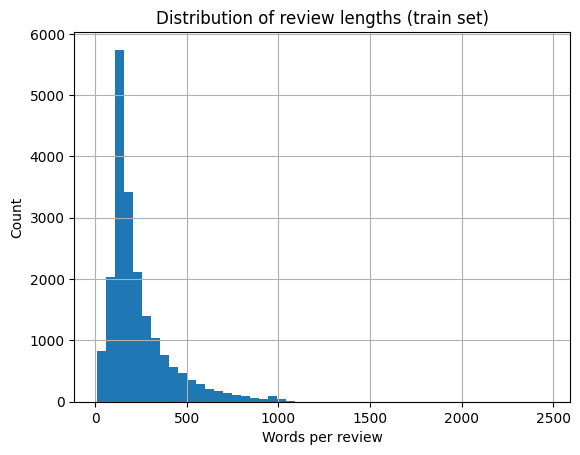

In [8]:
train_df["word_count"].hist(bins=50)
plt.title("Distribution of review lengths (train set)")
plt.xlabel("Words per review")
plt.ylabel("Count")
plt.show()

## 4. Save Processed Data
Save train, validation and test sets for reproducibility.

In [10]:
import os
os.makedirs("data/processed", exist_ok=True)

train_df.to_csv("../data/processed/train.csv", index=False)
valid_df.to_csv("../data/processed/valid.csv", index=False)
test_df.to_csv("../data/processed/test.csv", index=False)